In [1]:
#!/Users/swp7563/Anaconda3/envs/hddmEnv/Scripts
import pandas as pd
import matplotlib.pyplot as plt

import hddm

C:\Users\swp7563\Anaconda3\envs\hddmEnv\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
data=hddm.load_csv('C:/Users/swp7563/Anaconda3/envs/hddmEnv/data/ant_ddm.csv')

data.head(10)

,subj_idx,stim,rt,response,threat,group
0,3,congruent,0.407,1,NS,HC
1,3,congruent,0.470,1,NS,HC
2,3,congruent,0.483,1,NS,HC
3,3,incongruent,-999.000,0,NS,HC
4,3,congruent,0.466,1,NS,HC
5,3,incongruent,0.487,1,NS,HC
6,3,congruent,0.477,1,NS,HC
7,3,congruent,0.577,1,NS,HC
8,3,congruent,0.550,1,NS,HC
9,3,congruent,0.454,1,NS,HC


In [25]:
model_stim_x_group = hddm.HDDM (data, depends_on={'v': ['stim', 'group']},p_outlier=.05) 
model_stim_x_group.find_starting_values()
model_stim_x_group.sample(2000, burn=20)

 [-----------------100%-----------------] 2001 of 2000 complete in 3247.6 sec

In [40]:
v_HC_congruent, v_HC_incongruent, v_PDA_congruent, v_PDA_incongruent, v_PDNA_congruent, v_PDNA_incongruent = model_stim_x_group.nodes_db.node[['v(HC.congruent)', 'v(HC.incongruent)', 'v(PDA.congruent)', 'v(PDA.incongruent)', 'v(PDNA.congruent)', 'v(PDNA.incongruent)']]

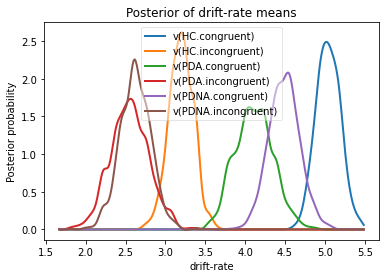

In [41]:
hddm.analyze.plot_posterior_nodes([v_HC_congruent, v_HC_incongruent, v_PDA_congruent, v_PDA_incongruent, v_PDNA_congruent, v_PDNA_incongruent])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate means')
plt.savefig('hddm_stim_x_group.pdf')

In [42]:
"P(HC.congruent > PDNA.congruent) = ", (v_HC_congruent.trace() > v_PDNA_congruent.trace()).mean()

('P(HC.congruent > PDNA.congruent) = ', 0.9868686868686869)

In [43]:
"P(HC.congruent > PDA.congruent) = ", (v_HC_congruent.trace() > v_PDA_congruent.trace()).mean()

('P(HC.congruent > PDA.congruent) = ', 0.9984848484848485)

In [44]:
"P(PDNA.congruent > PDA.congruent) = ", (v_PDNA_congruent.trace() > v_PDA_congruent.trace()).mean()

('P(PDNA.congruent > PDA.congruent) = ', 0.8909090909090909)

In [45]:
"P(HC.incongruent > PDNA.incongruent) = ", (v_HC_incongruent.trace() > v_PDNA_incongruent.trace()).mean()

('P(HC.incongruent > PDNA.incongruent) = ', 0.9914141414141414)

In [46]:
"P(HC.incongruent > PDA.incongruent) = ", (v_HC_incongruent.trace() > v_PDA_incongruent.trace()).mean()

('P(HC.incongruent > PDA.incongruent) = ', 0.9878787878787879)

In [47]:
"P(PDNA.incongruent > PDA.incongruent) = ", (v_PDNA_incongruent.trace() > v_PDA_incongruent.trace()).mean()

('P(PDNA.incongruent > PDA.incongruent) = ', 0.5934343434343434)